In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True, max_iter=100, lr=0.01, batch_size=10):
        # fit_intercept - добавление смещения
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.lr = lr
        self.batch_size = batch_size
        self.w = None

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке

        n, n_feat = X.shape
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        if self.w is None:
            self.w = np.random.randn(n_feat + 1 if self.fit_intercept else n_feat)

        self.loss = []

        for epoch in range(self.max_iter):
            y_pred = self.predict(X)
            self.loss.append(mean_squared_error(y, y_pred))
            grad = self._calc_gradient(X_train, y_pred, y)
            self.w -= self.lr * grad
        
        return self


    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, n_feat = X.shape
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X

        y_pred = X_train @ self.w
        return y_pred

    def _calc_gradient(self, X, y_pred, y):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        return grad.mean(axis=0)

    def get_weights(self):
        return self.w

    def get_loss(self):
        return self.loss

In [33]:
def linear_y(x):
    return 10 * x - 7

In [34]:
num_objects = 50

X = np.linspace(0, 10, num_objects)
y = linear_y(X) + np.random.randn(num_objects) * 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

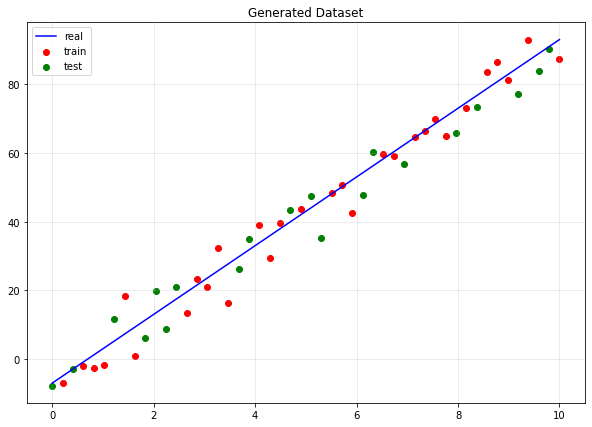

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_y(X), c='b', label='real')
plt.scatter(X_train, y_train, c='r', label='train')
plt.scatter(X_test, y_test, c='g', label='test')

plt.grid(alpha=0.3)
plt.legend()
plt.title('Generated Dataset')
plt.show()

In [69]:
linreg = MyLinearRegression()
linreg.fit(X_train[:, np.newaxis], y_train)
loss = linreg.get_loss()

y_pred = linreg.predict(X_test[:, np.newaxis])

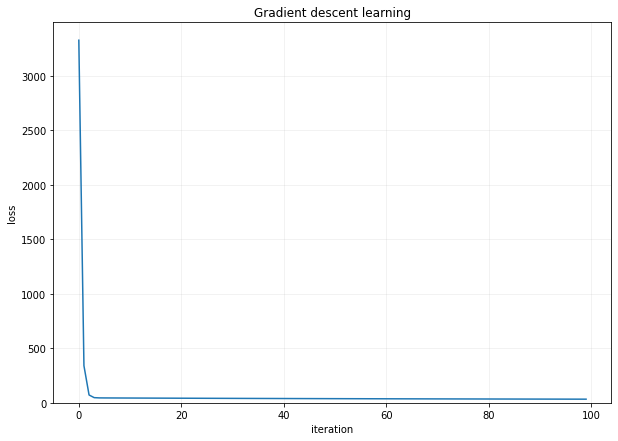

In [70]:
plt.figure(figsize=(10, 7))

plt.plot(loss)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

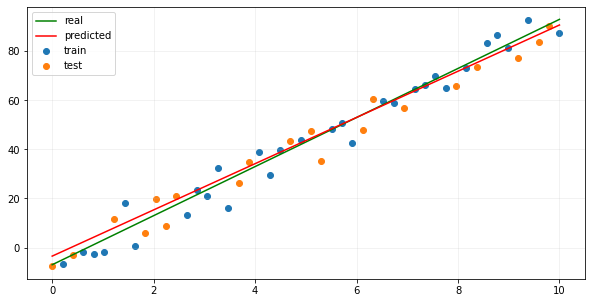

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(X, linear_y(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, linreg.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()